<a href="https://colab.research.google.com/github/saurabhkale17/ml/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k means clustering


1. Preapre data for k means clustering
2. Assign k random data points as centroids
3. Assign each data point to nearest centroid
4. For each cluster find out the centroid(which is the geometric centre)
5. Repeat step 2, 3 and 4 till convergence

Here convergence means until there is no change in the centroids


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=500, n_features=2, centers=3, random_state = 42)

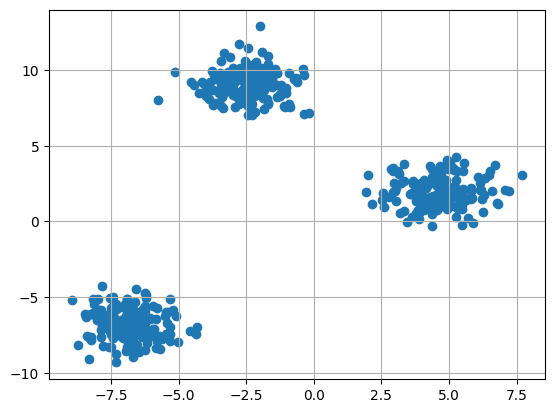

In [3]:
fig = plt.figure()
plt.grid(True)
plt.scatter(X[:, 0], X[:, -1])
plt.show()

In [4]:
print(min(X[:, 0]), max(X[:, 0]))
print(min(X[:, 1]), max(X[:, 1]))

-8.961556599034992 7.718759644683339
-9.303988919904903 12.867017618853042


Seclecting random points as centriods and plotting them on the graph for visualization

Clusters :  {0: {'centre': [-2.7141089707011377, 11.774304184000073], 'points': []}, 1: {'centre': [3.2483338388651983, 3.9688722477105145], 'points': []}, 2: {'centre': [-6.359116336540168, -5.8454333895205455], 'points': []}}


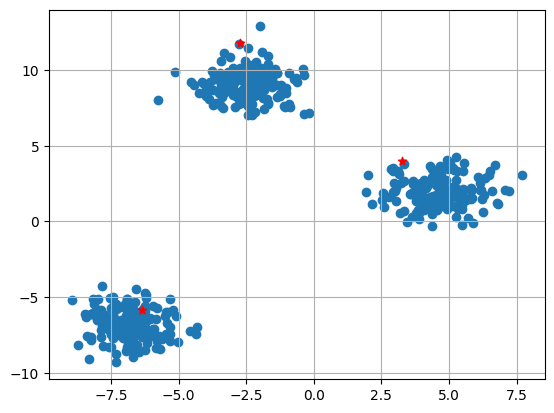

In [5]:
k = 3
centroid_list = []
plt.scatter(X[:, 0], X[:, 1])
plt.grid(True)
np.random.seed(42)
clusters = dict()
first, second = -1, -1
for i in range(k):
  first = (np.random.uniform(min(X[:, 0]), max(X[:, 0])))
  second = (np.random.uniform(min(X[:, 1]), max(X[:, 1])))
  cluster = {
      'centre': [first, second],
      'points': []
  }
  clusters[i] = cluster

  plt.scatter(first, second, marker = '*',c = 'red')
  centroid_list.append([first, second])


print("Clusters : ", clusters )

For every point in the dataset assign it to the nearest cluster

Find eucliudean distance function

In [6]:
def euclidean_distance(lst1, lst2):
  if len(lst1) != len(lst2):
    # if dimensions of two points is not the same
    return float('inf')

  dist = 0

  for num1, num2 in zip(lst1, lst2):
    dist += (num1-num2)**2

  return dist**0.5

First clear the points.
Then for each point in X assign it to nearest cluster and put points in the dict

In [7]:
for i in range(k):
  clusters[i]['points'].clear()

def reassign_points_to_clusters(X, clusters, centroid_list):
  for point in X:
    euc_dist = float('inf')
    for key, centroid in clusters.items():
      euc_dist_new = euclidean_distance(point, centroid_list[key])
      if euc_dist_new < euc_dist:
        euc_dist = euc_dist_new
        centroid_number = key

      # print("EUC DIST : ", euc_dist)
      # print("centroid number : ", centroid_number)
    # Updating which point belogs to which cluster here
    clusters[centroid_number]['points'].append(point)

reassign_points_to_clusters(X, clusters, centroid_list)
for i in range(3):
  print("points in cluster ", i, " : ", len(clusters[i]['points']))

points in cluster  0  :  165
points in cluster  1  :  169
points in cluster  2  :  166


Function to reassign centroid

In [8]:
# function to Calculate centroids given a list

def calculate_centroids(list1):
  n = len(list1)
  dimension = len(list1[0])
  new_centroid = [0 for i in range(dimension)]
  for point in list1:
    for index, dim in enumerate(point):
      new_centroid[index] += dim

  new_centroid1 = [new_centroid[i]/len(list1) for i in range(dimension)]

  return new_centroid1

In [11]:
# For 10 iterations recalculate the centroids
num_iter = 10

for i in range(num_iter):
  for j in range(k):
    new_centroid2 = calculate_centroids(clusters[j]['points'])
    # Reassign points to clusters
    reassign_points_to_clusters(X, clusters, centroid_list)
    if i == num_iter-1:
      print("At end of ", num_iter, "th iteration new centroid is : ", new_centroid2)
      centroid_list[j] = new_centroid2
    # clusters[j]['centre'] = new_centroid2

At end of  10 th iteration new centroid is :  [-2.5267915400298695, 9.04655709894569]
At end of  10 th iteration new centroid is :  [4.585490262920791, 1.962112028463894]
At end of  10 th iteration new centroid is :  [-6.831200018350124, -6.756575437886822]


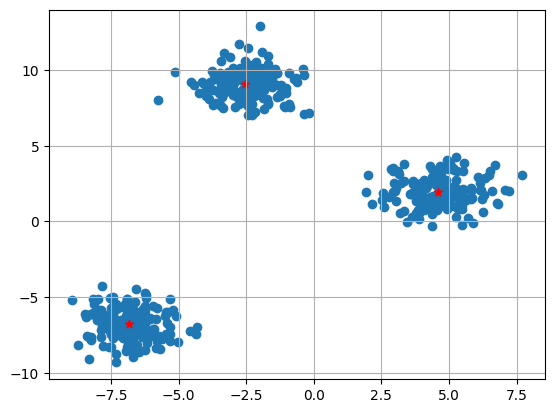

In [12]:
plt.scatter(X[:, 0], X[:, 1])
plt.grid(True)

for x, y in centroid_list:
  plt.scatter(x, y, marker = '*', c = 'red')

plt.show()